In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
from scipy.stats import expon
import statistics
import seaborn as sns

In [19]:
n = 25
x = np.array((expon.rvs(size = n)).round(2))
x = np.sort(x)

# A

In [20]:
mode = statistics.mode(x)
median = statistics.median(x)
l_scope = max(x) - min(x)
asymmetry = sps.skew(x, axis=0, bias=False)
print('mode = ', mode)
print('median = ', median)
print('l_scope = ', l_scope)
print('asymmetry = ', asymmetry)

mode =  0.01
median =  0.94
l_scope =  2.6
asymmetry =  0.3161489568444154


# B

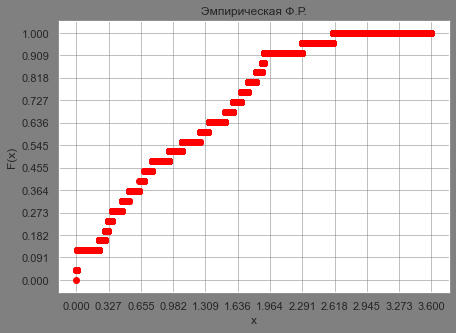

In [21]:
x_line = np.linspace(x[0], x[n-1]+1, 10000)
y = np.array([np.sum(x<i) for i in x_line])/len(x)
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x_line, y, color = 'red')
ax.set_xticks(np.linspace(0, x_line.max(), 12))
ax.set_yticks(np.linspace(0, y.max(), 12))
ax.set_title('Эмпирическая Ф.Р.')
ax.set_ylabel('F(x)')
ax.set_xlabel('x')
ax.grid(which='major', alpha = 0.5, color = 'grey') 
#plt.show()

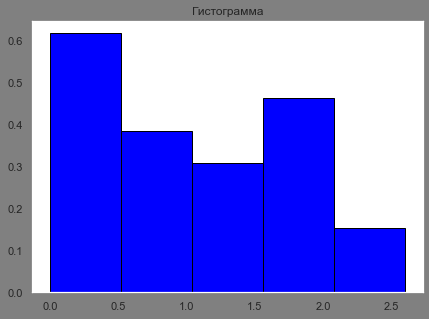

In [22]:
k = 1 + np.log2(n)
fig, ax = plt.subplots(figsize=(7, 5))
plt.hist(x, bins = int(k), density=True, histtype='bar', edgecolor='black', color = 'blue')
ax.set_title('Гистограмма')
plt.show()

In [23]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'gray'})

Text(0.5, 0, 'values')

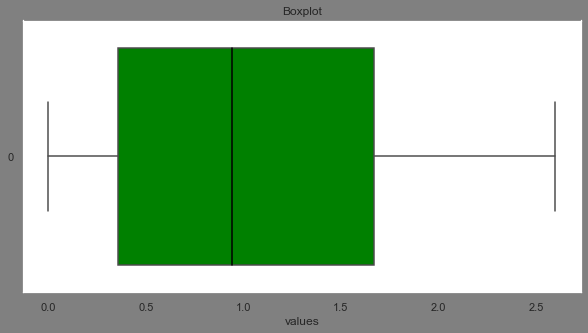

In [24]:
fig, ax = plt.subplots(figsize = (10,5))
bp = sns.boxplot(x, orient='h', boxprops={"facecolor":"green"},
    medianprops={"color": "black"},)
ax.set_title('Boxplot')
bp.set_xlabel('values')

# C

In [25]:
#x_mean = statictics.mean(x)
#s = np.sqrt(1/(n - 1) * np.sum((x - x_mean)**2))
#h = 2.344 * s / (n**0.2)
#def q_func(x, h, x0):
#    return 3/4*(1-((x-x0)/h)**2)

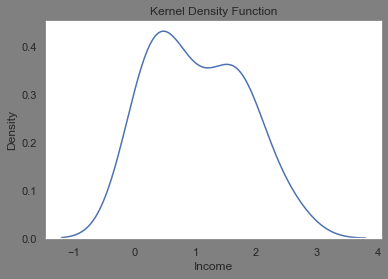

In [26]:
kern = sns.kdeplot(data=x, common_norm=False)
#sns.histplot(data=x, bins=int(k), stat='density', common_norm=False)
kern.set_xlabel('Income')
plt.title("Kernel Density Function");

# D

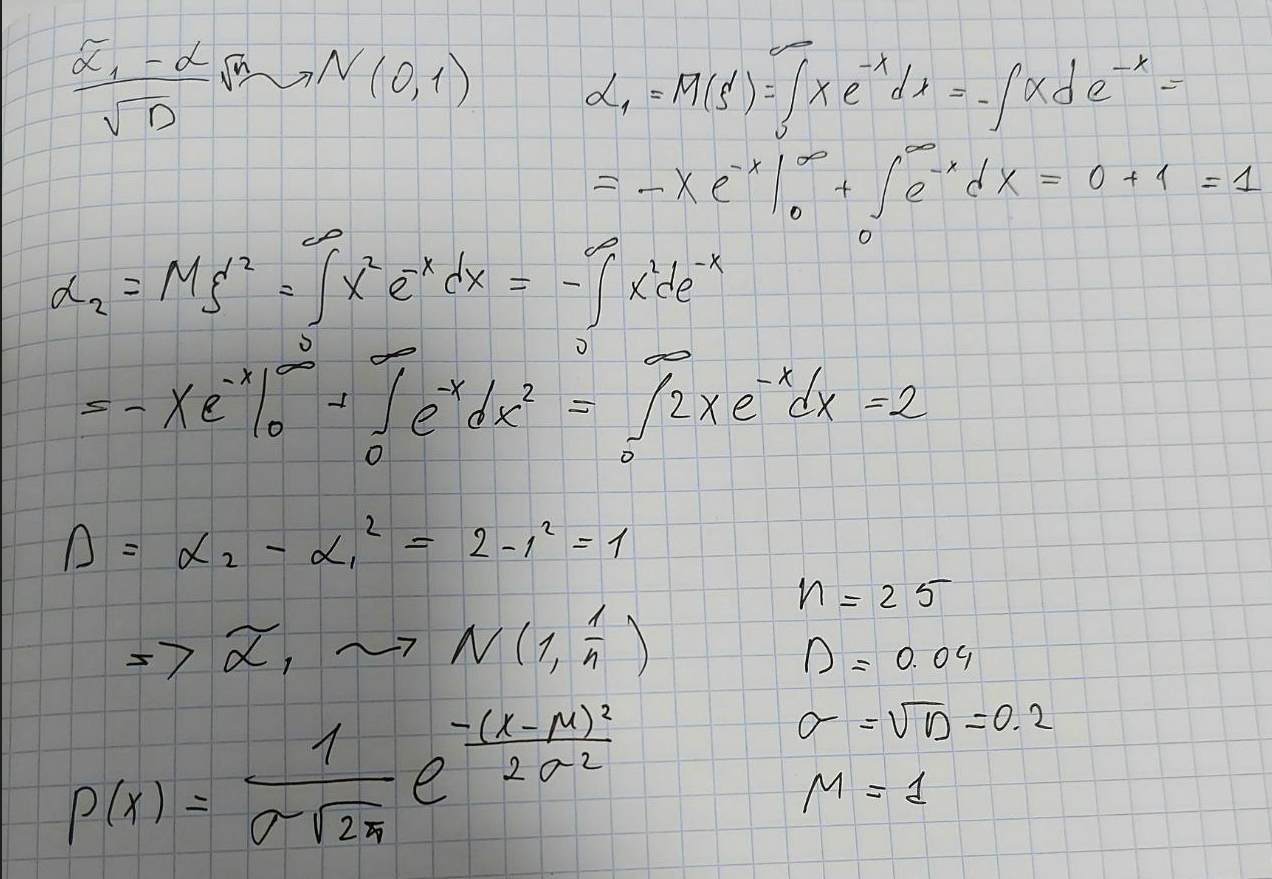

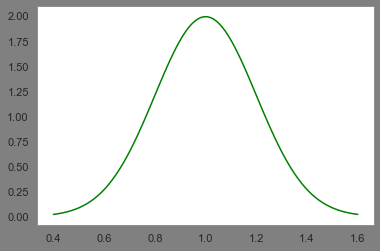

In [27]:

mu = 1
D = 0.04
sigma = np.sqrt(D)
x_th = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x_th, sps.norm.pdf(x_th, mu, sigma), color = 'green')

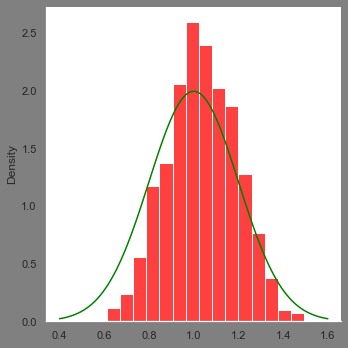

In [28]:
boot_mean = []
for _ in range(1000):
    bootsample = np.random.choice(x, size=n,replace=True)
    boot_mean.append(bootsample.mean())
bt =sns.displot(boot_mean, bins = 15, color = 'red', stat = 'density')
ab =plt.plot(x_th, sps.norm.pdf(x_th, mu, sigma), color = 'green')

# E

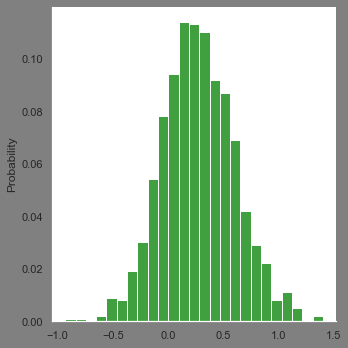

In [29]:
boot_asym = []
for _ in range(1000):
    bootsample = np.random.choice(x, size=n, replace=True)
    boot_asym.append(sps.skew(bootsample))
bt=sns.displot(boot_asym, bins = n, color = 'green', stat="probability")

# F
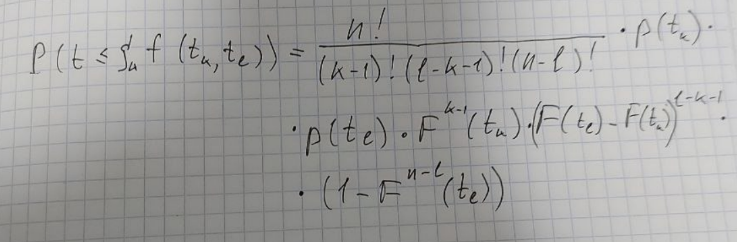